
# Hierarchical Clustering

### <b>Welcome to Lab 4b of Machine Learning with Python.</b>
<p><b>Machine Learning is a form of artificial intelligence (AI), where the system can "learn" without explicitly being coded</b></p>

In this lab exercise, you will learn some popular machine learning algorithms. For <b>supervised learning</b>, we will discuss <b>decision trees</b> and <b>random forests</b>. In <b>unsupervised learning</b>, we will discuss <b>k-means clustering</b>, <b>agglomerative hierarchical clustering</b>, and <b>density-based clustering</b> or <b>DBSCAN</b>.


### Some Notebook Commands Reminders:
<ul>
    <li>Run a cell: CTRL + ENTER</li>
    <li>Create a cell above a cell: a</li>
    <li>Create a cell below a cell: b</li>
    <li>Change a cell to Markdown: m</li>
    
    <li>Change a cell to code: y</li>
</ul>

<b> If you are interested in more keyboard shortcuts, go to Help -> Keyboard Shortcuts </b>

# <u> Hierarchical Clustering - Agglomerative</u> 

We will be looking at the next clustering technique, which is <b>Agglomerative Hierarchical Clustering</b>. Remember that agglomerative is the bottom up approach. <br> <br>
In this lab, we will be looking at Agglomerative clustering, which is more popular than Divisive clustering. <br> <br>
We will also be using Complete Linkage as the Linkage Criteria. <br>
<b> <i> NOTE: You can also try using Average Linkage wherever Complete Linkage would be used to see the difference! </i> </b>

---
Import Libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>ndimage</b> from <b>scipy</b> </li>
    <li> <b>hierarchy</b> from <b>scipy.cluster</b> </li>
    <li> <b>pyplot as plt</b> from <b>matplotlib</b> </li>
    <li> <b>manifold</b> from <b>sklearn</b> </li>
    <li> <b>datasets</b> from <b>sklearn</b> </li>
    <li> <b>AgglomerativeClustering</b> from <b>sklearn</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
</ul> <br>
Also run <b>%matplotlib inline</b> that that wasn't run already.

In [1]:
import numpy as np 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

---
### Generating Random Data
We will be generating another set of data using the <b>make_blobs</b> class once again. This time you will input your own values! <br> <br>
Input these parameters into make_blobs:
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Choose a number from 10-1500 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. The larger the number, the further apart the clusters</li>
    <ul> <li> Choose a number between 0.5-1.5 </li> </ul>
</ul> <br>
Save the result to <b>X2</b> and <b>y2</b>.

In [2]:
X2, y2 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Plot the scatter plot of the randomly generated data

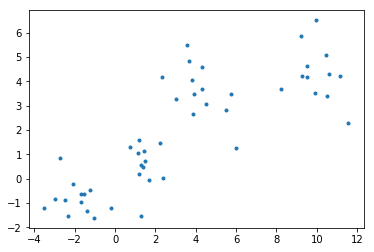

In [3]:
plt.scatter(X2[:, 0], X2[:, 1], marker='.') 

---
### Agglomerative Clustering
We will start by clustering the random data points we just created.

The <b> AgglomerativeClustering </b> class will require two inputs:
<ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 </li> </ul>
    <li> <b>linkage</b>: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. </li>
    <ul> 
        <li> Value will be: 'complete' </li> 
        <li> <b>Note</b>: It is recommended you try everything with 'average' as well </li>
    </ul>
</ul> <br>
Save the result to a variable called <b> agglom </b>

In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

Fit the model with <b> X2 </b> and <b> y2 </b> from the generated data above.

In [5]:
agglom.fit(X2,y2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func=<function mean at 0x106cc6598>)

Run the following code to show the clustering! <br>
Remember to read the code and comments to gain more understanding on how the plotting works.

### Complete Linkage dendogram

In [6]:
dist_matrix = distance_matrix(X2,X2) 
print(dist_matrix)

[[0.         5.22463317 4.85780491 ... 2.95365913 4.87308275 3.02397451]
 [5.22463317 0.         0.43953531 ... 4.29776589 9.352639   3.85244981]
 [4.85780491 0.43953531 0.         ... 4.14216645 9.09758375 3.70309782]
 ...
 [2.95365913 4.29776589 4.14216645 ... 0.         5.25699904 0.44689689]
 [4.87308275 9.352639   9.09758375 ... 5.25699904 0.         5.6810094 ]
 [3.02397451 3.85244981 3.70309782 ... 0.44689689 5.6810094  0.        ]]


Using the <b> linkage </b> class from hierarchy, pass in the parameters:
<ul>
    <li> The distance matrix </li>
    <li> 'complete' for complete linkage </li>
</ul> <br>
Save the result to a variable called <b> Z </b>

In [7]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

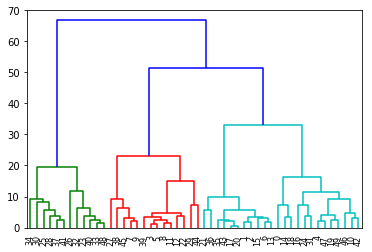

In [8]:
dendro = hierarchy.dendrogram(Z)